In [12]:
%%file encontrar_pares.c
#include <math.h>
#include <stdlib.h>

void encontrar_pares(int* arreglo,int longArreglo,int* x,int* y,int* k){
    int cantPares=0;
    for(int i=0;i<longArreglo;i++){
        for(int j=i+1;j<longArreglo;j++){
            if(fabs(sqrt(1.0*arreglo[i]*arreglo[j])-trunc(sqrt(1.0*arreglo[i]*arreglo[j])))<0.0001){
                
                //Con esto está llenando los vectores x e y
                x[cantPares]=arreglo[i];
                y[cantPares]=arreglo[j];  
                cantPares++;
            }
        }
    }
    *k=cantPares;
}


Overwriting encontrar_pares.c


In [13]:
!gcc -c encontrar_pares.c

In [14]:
!gcc -shared encontrar_pares.o -o encontrar_pares.so

In [15]:
import ctypes
import numpy as np

def ctypes_encontrar_pares():
    lib=ctypes.CDLL('./encontrar_pares.so')
    lib.encontrar_pares.argtypes=[np.ctypeslib.ndpointer(dtype=np.int32),
                                  ctypes.c_int,
                                  np.ctypeslib.ndpointer(dtype=np.int32),
                                  np.ctypeslib.ndpointer(dtype=np.int32),
                                  np.ctypeslib.ndpointer(dtype=np.int32)]
    return lib.encontrar_pares

In [16]:
ctypes_encontrar_pares_raw=ctypes_encontrar_pares()

In [20]:
k=np.zeros(1,dtype=np.int32)
xaux=np.zeros(int((longArreglo-1)*(longArreglo)/2),dtype=np.int32)
yaux=np.zeros(int((longArreglo-1)*(longArreglo)/2),dtype=np.int32)
ctypes_encontrar_pares_raw=ctypes_encontrar_pares()
ctypes_encontrar_pares_raw(arreglo,longArreglo,xaux,yaux,k)
x=np.array(xaux[:int(k)])
y=np.array(yaux[:int(k)])
print(x)
print(y)

[9 9 4 2]
[4 1 1 8]


In [18]:
def c_encontrar_pares(arreglo,longArreglo):
    k=np.zeros(1,dtype=np.int32)
    xaux=np.zeros(int((longArreglo-1)*(longArreglo)/2),dtype=np.int32)
    yaux=np.zeros(int((longArreglo-1)*(longArreglo)/2),dtype=np.int32)
    ctypes_encontrar_pares_raw=ctypes_encontrar_pares()
    ctypes_encontrar_pares_raw(arreglo,longArreglo,xaux,yaux,k)
    x=np.array(xaux[:int(k)])
    y=np.array(yaux[:int(k)])
    return x,y

In [19]:
arreglo=np.array([9,5,4,3,1,7,2,8],dtype=np.int32)
longArreglo=len(arreglo)
xC,yC=c_encontrar_pares(arreglo,longArreglo)
print(xC)
print(yC)

[9 9 4 2]
[4 1 1 8]


In [113]:
def python_encontrar_pares(arreglo,longArreglo):
    k=0
    x=np.zeros(int((longArreglo-1)*(longArreglo)/2),dtype=np.int32)
    y=np.zeros(int((longArreglo-1)*(longArreglo)/2),dtype=np.int32)
    for i in range(longArreglo):
        for j in range(i+1,longArreglo):
            if(abs(pow((1.0*arreglo[i]*arreglo[j]),0.5)-np.ceil(pow((1.0*arreglo[i]*arreglo[j]),0.5)))<0.0001):
                x[k]=arreglo[i]
                y[k]=arreglo[j]
                k+=1
    xaux=np.array(x[:k])
    yaux=np.array(y[:k])
    return xaux,yaux

In [114]:
arreglo=np.array([9,5,4,3,1,7,2,8],dtype=np.int32)
longArreglo=len(arreglo)
xPython,yPython=python_encontrar_pares(arreglo,longArreglo)
print(xPython)
print(yPython)

[9 9 4 2]
[4 1 1 8]


In [115]:
np.linalg.norm(xC-xPython)/np.linalg.norm(xPython)

0.0

In [116]:
np.linalg.norm(yC-yPython)/np.linalg.norm(yPython)

0.0

In [69]:
import time
timePython=[]
timeC=[]
arreglo=np.random.randint(1,10,size=1024,dtype=np.int32)
longArreglo=len(arreglo)
for i in range(50):
    tic=time.perf_counter()
    x,y=python_encontrar_pares(arreglo,longArreglo)
    toc=time.perf_counter()
    timePython.append(1e6*(toc-tic))
    tic=time.perf_counter()
    x,y=c_encontrar_pares(arreglo,longArreglo)
    toc=time.perf_counter()
    timeC.append(1e6*(toc-tic))

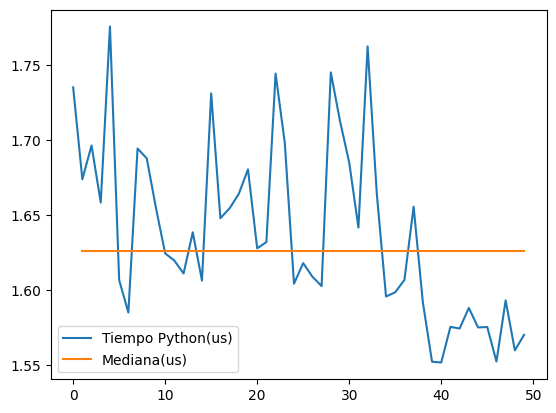

In [120]:
import matplotlib.pyplot as plt
plt.plot(range(50),timePython,label="Tiempo Python(us)")
plt.plot([1,49],[np.median(timePython),np.median(timePython)],label="Mediana(us)")
plt.legend()
plt.savefig("tiempoPython.png",dpi=500)

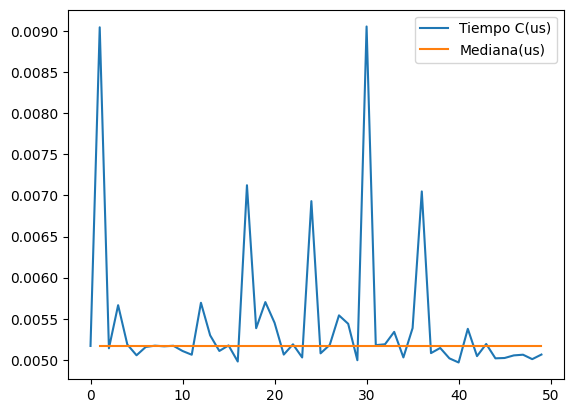

In [121]:
plt.plot(range(50),timeC,label="Tiempo C(us)")
plt.plot([1,49],[np.median(timeC),np.median(timeC)],label="Mediana(us)")
plt.legend()
plt.savefig("tiempoC.png",dpi=500)

In [76]:
elementos=[32,64,128,256,512,1024]
listaMedianaC=[]
listaMedianaPython=[]
for i in elementos:
    timePython=[]
    timeC=[]
    arreglo=np.random.randint(1,10,size=i,dtype=np.int32)
    longArreglo=i
    for j in range(50):
        tic=time.perf_counter()
        python_encontrar_pares(arreglo,longArreglo)
        toc=time.perf_counter()
        timePython.append(toc-tic)
        tic=time.perf_counter()
        c_encontrar_pares(arreglo,longArreglo)
        toc=time.perf_counter()
        timeC.append(toc-tic)
    listaMedianaC.append(np.median(timeC))
    listaMedianaPython.append(np.median(timePython))

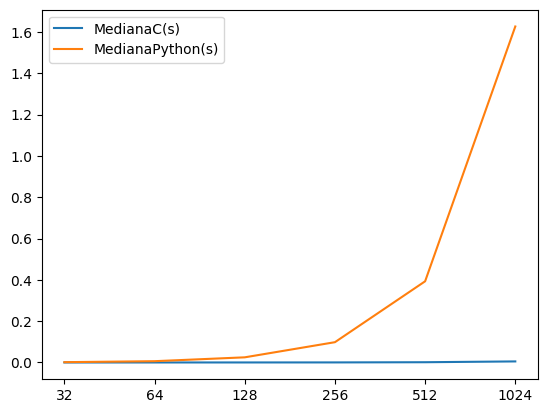

In [118]:
plt.plot(['32','64','128','256','512','1024'],listaMedianaC,label="MedianaC(s)")
plt.plot(['32','64','128','256','512','1024'],listaMedianaPython,label="MedianaPython(s)")
plt.legend()
plt.savefig("comparacionMedianas.png",dpi=500)

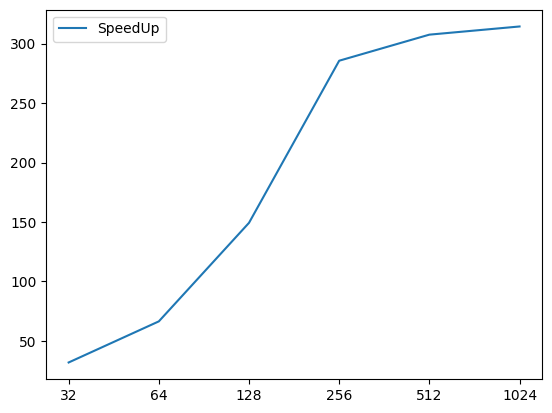

In [80]:
SUp=np.array(listaMedianaPython)/np.array(listaMedianaC)
plt.plot(['32','64','128','256','512','1024'],SUp,label="SpeedUp")
plt.legend()
plt.savefig("speedUp.png",dpi=500)